In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
data_dir = 'demo/'
time_file = data_dir + 'tweet_times_positive.csv'
time_pred_file = data_dir + 'tweet_times_predpos.csv'

In [3]:
def read_time(file, label):
    times = sorted([pd.Timestamp(row['tweet_time'], tz='utc') for idx, row in pd.read_csv(file).iterrows()])
    return pd.DataFrame({label: [1] * len(times)}, index=times)

def combine_times(dfs, label):
    times = sorted([t for df in dfs for t in df.index])
    return pd.DataFrame({label: [1] * len(times)}, index=times)

def times_in_range(times, start, end):
    return times[(start < times.index) & (times.index < end)]

In [4]:
start_time = pd.Timestamp('2017-09-04 00:00:00', tz='utc')
end_time = pd.Timestamp('2017-09-12 00:00:00', tz='utc')
labeled = times_in_range(read_time(time_file, 'labeled'), start_time, end_time)
predicted = times_in_range(read_time(time_pred_file, 'pred'), start_time, end_time)
combined = combine_times([labeled, predicted], 'labeled + pred')

In [5]:
i95 = pd.read_excel('traffic/Zone-Data-Export-10077.xlsx', index_col="Timestamp")
i75 = pd.read_csv('traffic/Zone-Data-Export-9828.csv', index_col="Timestamp")
i75.index = pd.to_datetime(i75.index)
i95.index = pd.to_datetime(i95.index)
start_date = '2017-09-05'
end_date = '2017-09-10'
i75 = i75[start_date:end_date]
i95 = i95[start_date:end_date]

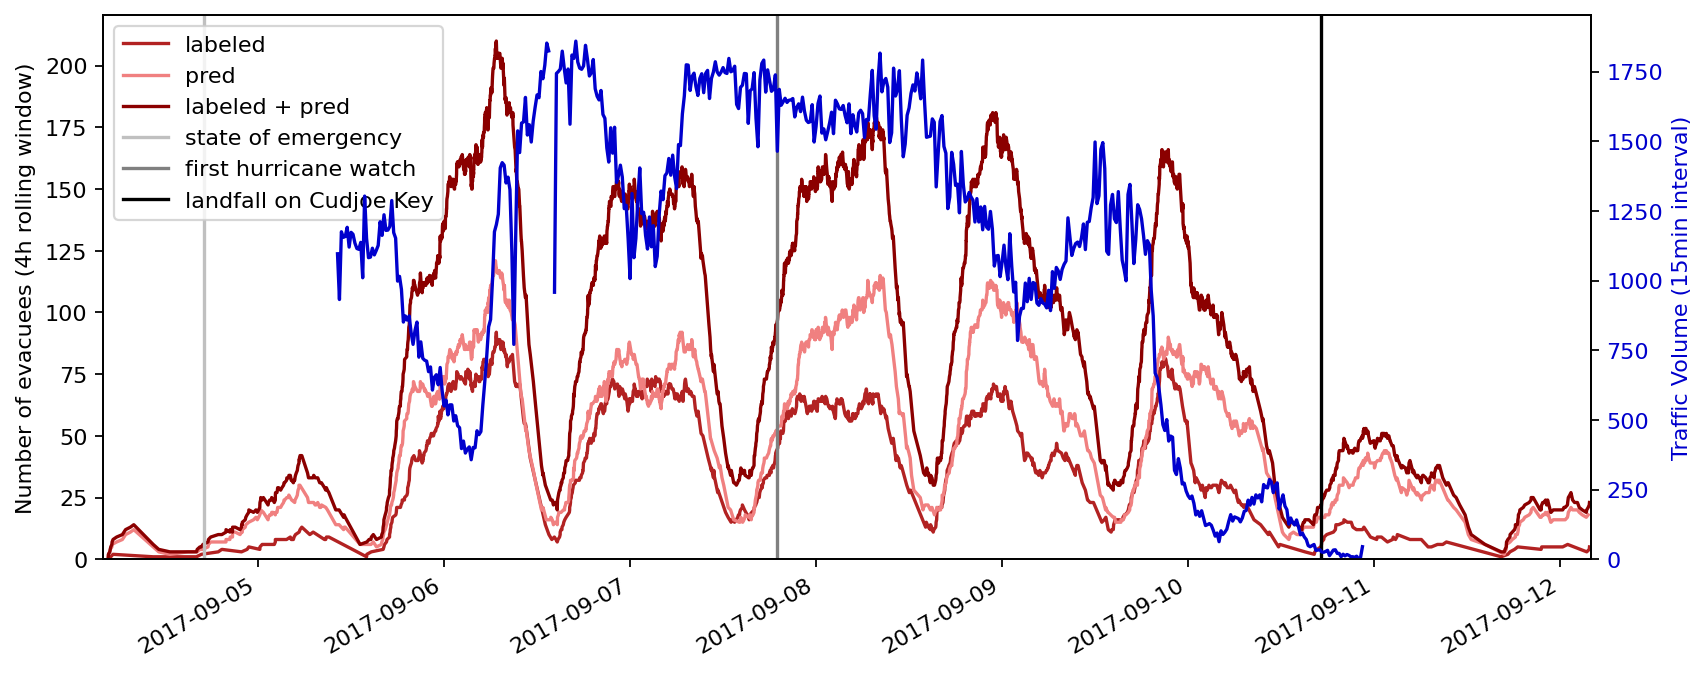

In [7]:
def plot_(df, label, ax, color):
    ax.plot(df.index, df[label], color=color, label=label)

fig, ax1 = plt.subplots(figsize=(12,5), dpi=160)

labeled.rolling('4H').sum().plot(ax=ax1, color=['firebrick'])
predicted.rolling('4H').sum().plot(ax=ax1, color=['lightcoral'])
combined.rolling('4H').sum().plot(ax=ax1, color=['darkred'])
#plot_(labeled.rolling('4H').sum(), 'labeled', ax1, 'firebrick')
#plot_(predicted.rolling('4H').sum(), 'pred', ax1, 'lightcoral')
#plot_(combined.rolling('4H').sum(), 'labeled + pred', ax1, 'darkred')
ax1.set_ylim(0)
ax1.set_ylabel('Number of evacuees (4h rolling window)')
ax1.set_xlim(start_time, end_time)

ax1.axvline(pd.Timestamp('2017-09-04 17:00:00+0400'), color='silver', label='state of emergency')
ax1.axvline(pd.Timestamp('2017-09-07 15:00:00+0000'), color='gray', label='first hurricane watch')
ax1.axvline(pd.Timestamp('2017-09-10 13:10:00+0000'), color='black', label='landfall on Cudjoe Key')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
traffic = (i95+i75).Volume
ax2.plot(traffic.index, traffic, color='mediumblue')
#traffic.plot(ax=ax2, color=['mediumblue'])
ax2.set_ylabel('Traffic Volume (15min interval)', color='mediumblue')
ax2.tick_params(axis='y', labelcolor='mediumblue')
ax2.set_ylim(0)

plt.show()